# import modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

os.chdir('C:\\Users\\Admin\\DM_project') #I use this line to change my current work directory

# Hide warnings
I use this script to hide warnings accur during run code.

In [2]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

## Read csv files 

In [6]:
orders_df = pd.read_csv('.//input//orders.csv')
aisles_df = pd.read_csv('.//input//aisles.csv') 
department_df = pd.read_csv('.//input//departments.csv')
order_products__prior_df = pd.read_csv('./input//order_products__prior.csv')
order_products__train_df = pd.read_csv('.//input//order_products__train.csv')
products_df = pd.read_csv('.//input//products.csv')

# Analysis on orders data frame 

In [7]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
orders_df.shape

(3421083, 7)

In [9]:
isna = orders_df.isna().sum(axis=0) #see if there is any missing value
isna

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
orders_df.loc[orders_df.order_number==1].count() #As we have 206209 rows with order_number=1, we have no any missing value!

order_id                  206209
user_id                   206209
eval_set                  206209
order_number              206209
order_dow                 206209
order_hour_of_day         206209
days_since_prior_order         0
dtype: int64

D:\soft\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


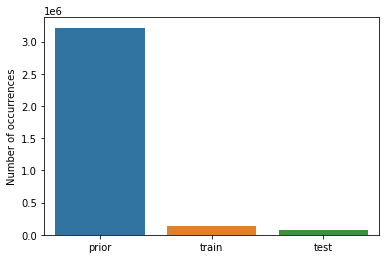

In [11]:
order_value_set = orders_df.eval_set.value_counts()
sns.barplot(order_value_set.index,order_value_set.values)
plt.ylabel('Number of occurrences')
plt.show()

In [12]:
print(order_value_set)

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


D:\soft\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


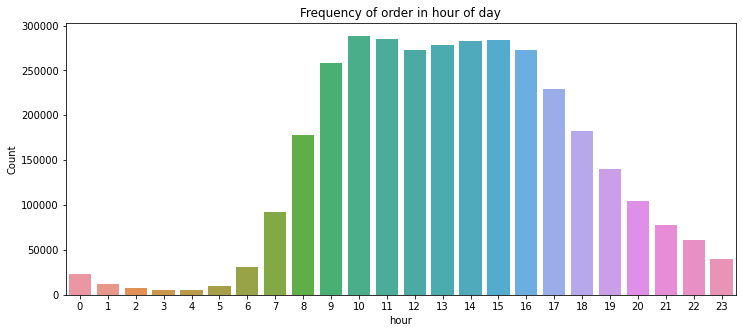

In [13]:
order_time = orders_df.order_hour_of_day.value_counts()
plt.figure(figsize=(12,5))
sns.barplot(order_time.index,order_time.values)
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('Frequency of order in hour of day')
plt.show()

As you see, most buyers make their purchases between 8 and 17. it's inline with our intuition

D:\soft\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


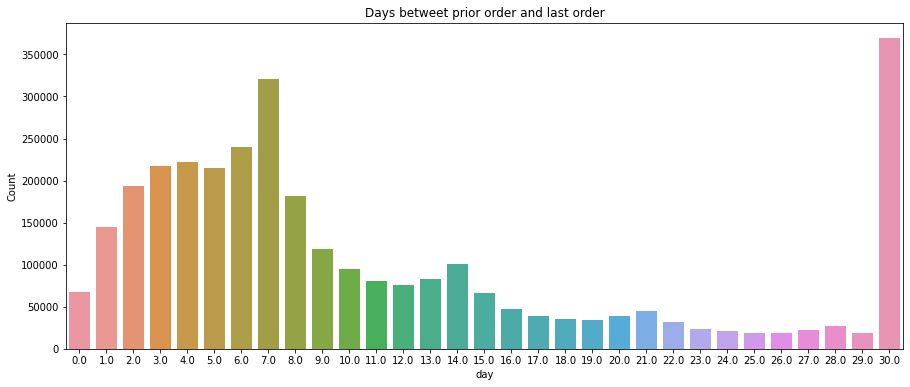

In [14]:
days_between_order = orders_df.days_since_prior_order.value_counts()
plt.figure(figsize=(15,6))
sns.barplot(days_between_order.index,days_between_order.values)
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Days betweet prior order and last order')
plt.show()

This bar plot shows the days between two purchase.

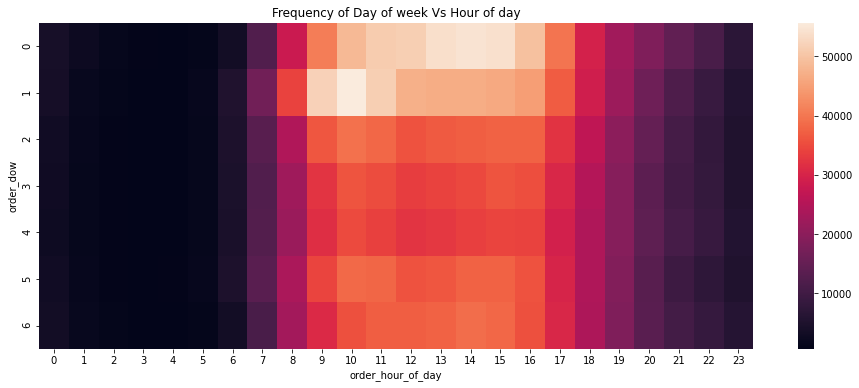

In [15]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(16,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

First day of week evening seems a primary time for instacart!

D:\soft\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


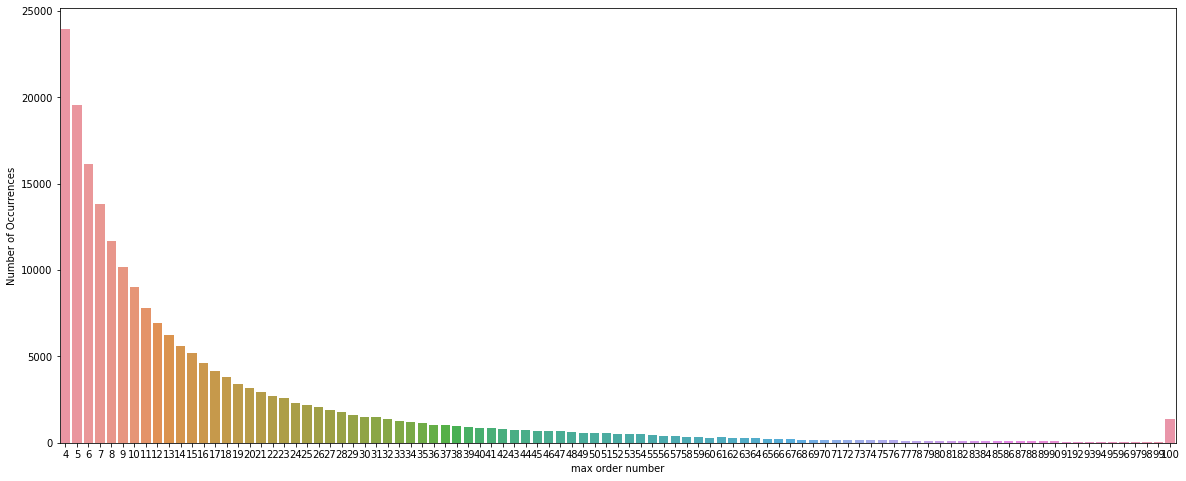

In [18]:
order__number = orders_df.groupby(by='user_id')['order_number'].aggregate(np.max).reset_index()
order__number = order__number.order_number.value_counts()
plt.figure(figsize=(20,8))
sns.barplot(order__number.index,order__number.values)
plt.xlabel('max order number')
plt.ylabel('Number of Occurrences')
plt.show()

So there are no orders less than 4 and is max capped at 100 as given in the data 
## aisles

In [19]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
aisles_df.shape

(134, 2)

## departments

In [21]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
department_df.shape

(21, 2)

## order products prior

In [23]:
order_products__prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [24]:
isna = order_products__prior_df.isna().sum(axis=0)
isna #so we have no missing value

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [25]:
reordered_product = order_products__prior_df.reordered.value_counts()
ratio = reordered_product/order_products__prior_df.shape[0]
ratio

1    0.589697
0    0.410303
Name: reordered, dtype: float64

In [26]:
reordered_product = order_products__train_df.reordered.value_counts()
ratio = reordered_product/order_products__train_df.shape[0]
ratio

1    0.598594
0    0.401406
Name: reordered, dtype: float64

Above you can see the ratio of  reorder products to total orders.
as you see prior and train data have almost equal ratio 

In [27]:
orders = order_products__prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
reorders = orders[orders['reordered'] != 0]

ratio = reorders.shape[0]/orders.shape[0]
ratio

0.8791514068669565

In [28]:
orders = order_products__train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
reorders = orders[orders['reordered'] != 0]

ratio = reorders.shape[0]/orders.shape[0]
ratio

0.9344404728334185

Above you see the ratio of reorders to total orders. as you see prior and train data have a 6 percent difference

D:\soft\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


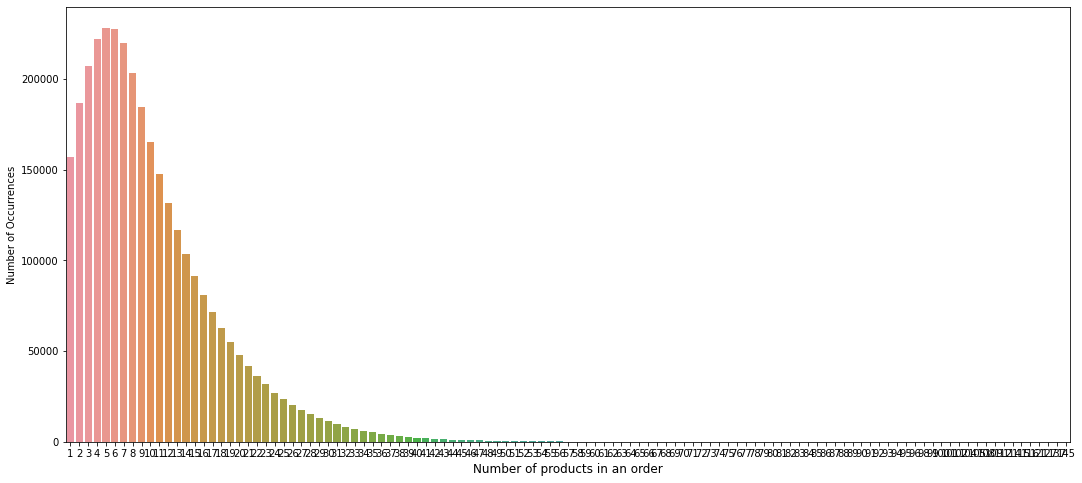

In [29]:
purchase_in_order = order_products__prior_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
purchase_in_order = purchase_in_order.add_to_cart_order.value_counts()

plt.figure(figsize=(18,8))
sns.barplot(purchase_in_order.index, purchase_in_order.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Number of products in an order', fontsize=12)
plt.show()